In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df=pd.get_dummies(data=df,columns=['Geography','Gender'],drop_first=False)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,True,False,False,True,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True


In [13]:
df=df.astype(int)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,1,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,1,0,0,1,0
9998,772,42,3,75075,2,1,0,92888,1,0,1,0,0,1


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [17]:
X.shape

(10000, 13)

In [18]:
y.shape

(10000,)

In [19]:
X_train , X_test , y_train , y_test =train_test_split(X, y , test_size=0.2 , random_state=1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.fit_transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 2694 to 235
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        8000 non-null   int64
 1   Age                8000 non-null   int64
 2   Tenure             8000 non-null   int64
 3   Balance            8000 non-null   int64
 4   NumOfProducts      8000 non-null   int64
 5   HasCrCard          8000 non-null   int64
 6   IsActiveMember     8000 non-null   int64
 7   EstimatedSalary    8000 non-null   int64
 8   Geography_France   8000 non-null   int64
 9   Geography_Germany  8000 non-null   int64
 10  Geography_Spain    8000 non-null   int64
 11  Gender_Female      8000 non-null   int64
 12  Gender_Male        8000 non-null   int64
dtypes: int64(13)
memory usage: 875.0 KB


In [38]:
model.add(Dense(11, activation='relu', input_dim=13)) # Use relu in hidden layer
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306 (1.20 KB)

 Trainable params: 212 (848.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 94 (380.00 B)

In [41]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
history=model.fit(X_scaled_train,y_train,epochs=100 ,validation_split=0.2, verbose=True)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8414 - loss: 0.3967 - val_accuracy: 0.8244 - val_loss: 0.4106
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8392 - loss: 0.3978 - val_accuracy: 0.8256 - val_loss: 0.4103
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8395 - loss: 0.3971 - val_accuracy: 0.8269 - val_loss: 0.4103
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8402 - loss: 0.3969 - val_accuracy: 0.8231 - val_loss: 0.4108
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8414 - loss: 0.3969 - val_accuracy: 0.8250 - val_loss: 0.4104
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8414 - loss: 0.3971 - val_accuracy: 0.8213 - val_loss: 0.4142
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8398 - loss: 0.3972 - val_accuracy: 0.8275 - val_loss: 0.4105
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8398 - loss: 0.3975 - val_accu

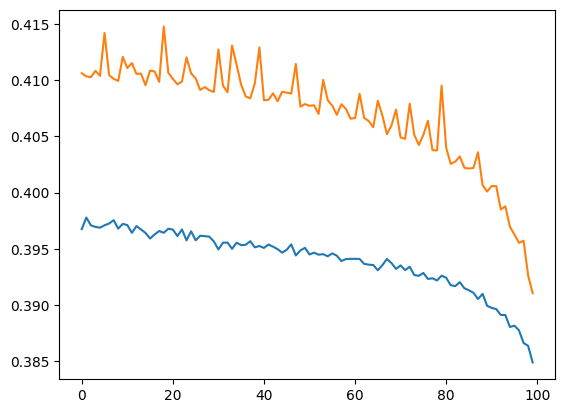

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

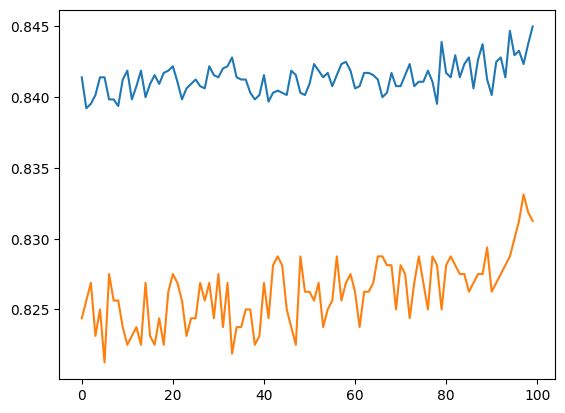

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [43]:
model.layers[0].get_weights()

[array([[-0.02731685,  0.20371988,  0.01675439],
        [ 0.4047669 , -2.7425244 , -2.1605055 ],
        [ 0.15583235, -0.6235615 ,  0.30398747],
        [-0.20033734,  0.3215334 , -0.1827965 ],
        [-0.0126457 ,  0.3023079 , -0.06195994],
        [ 0.20426685, -0.50388986,  0.09415456],
        [ 1.3333968 , -1.1983945 , -0.9955919 ],
        [-0.00618831,  0.33055213, -0.30554056],
        [ 0.22619797,  0.77799773,  0.04837794],
        [-0.08393438,  0.5741093 , -0.13768275],
        [ 0.32072854, -0.0249684 ,  0.2413842 ],
        [-0.27328348,  0.11452531,  0.23452067],
        [ 0.11709865, -0.05777941,  0.27432102]], dtype=float32),
 array([-0.45662132,  0.40897262,  0.1359919 ], dtype=float32)]

In [44]:
y_log=model.predict(X_scaled_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [45]:
y_pred=np.where(y_log>0.5 , 1 , 0)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_pred, y_test)

0.835